#### history = model.fit()

history所包含的的信息：
+ 训练集loss：loss
+ 测试集loss：val_loss
+ 训练集准确率：sparse_categorical_accuracy
+ 测试集准确率：val_categorical_accuracy

###### eg.

    # 提取信息
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss]
    val_loss = history.history['val_loss']
    
    # 画图
    # subplot将图片分为一行两列，这段代码是第一列
    plt.subplot(1,2,1)
    plt.plot(acc,label="Training Accuracy")
    plt.plot(val_acc,label="Validation Accuracy")
    plt.title('Training and Validation Accuracy')
    # 画出图例
    plt.legend()
    
    # 这段代码是第二列
    plt.subplot(1,2,2)
    plt.plot(loss,label="Training Loss")
    plt.plot(val_lossmlabel="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    
    plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2611 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.1423 - val_sparse_categorical_accuracy: 0.9584
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1141 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.1051 - val_sparse_categorical_accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0775 - sparse_categorical_accuracy: 0.9770 - val_loss: 0.0849 - val_sparse_categorical_accuracy: 0.9735
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0576 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0775 - val_sparse_categorical_accuracy: 0.9752
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0439 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.0762 - val_sparse_categorical_accuracy: 0.9766
Model: "sequential"


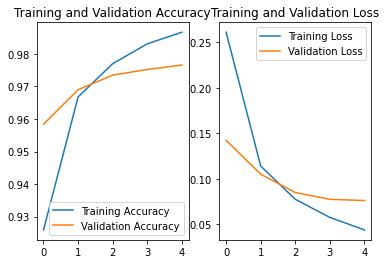

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
